# Stratified_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

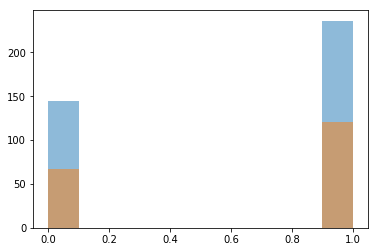

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [5]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 1, 'gamma': 0.001}

In [7]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [8]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005804,0.001402,0.619423,0.619422,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",6,0.623377,0.618421,...,0.618421,0.619672,0.618421,0.619672,0.618421,0.619672,0.001166,0.000490,0.00199,0.0005
1,0.002413,0.000400,0.619423,0.619422,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",6,0.623377,0.618421,...,0.618421,0.619672,0.618421,0.619672,0.618421,0.619672,0.002955,0.000801,0.00199,0.0005
2,0.007451,0.000200,0.619423,0.619422,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",6,0.623377,0.618421,...,0.618421,0.619672,0.618421,0.619672,0.618421,0.619672,0.007025,0.000401,0.00199,0.0005
3,0.008213,0.001227,0.619423,0.619422,0.001,1,"{'C': 0.001, 'gamma': 1}",6,0.623377,0.618421,...,0.618421,0.619672,0.618421,0.619672,0.618421,0.619672,0.007045,0.001002,0.00199,0.0005
4,0.012504,0.000000,0.619423,0.619422,0.001,10,"{'C': 0.001, 'gamma': 10}",6,0.623377,0.618421,...,0.618421,0.619672,0.618421,0.619672,0.618421,0.619672,0.006252,0.000000,0.00199,0.0005


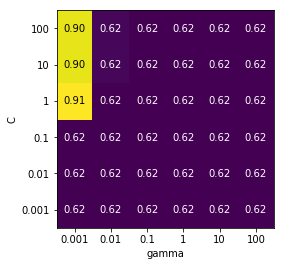

In [9]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# Zad

Popraw greed i narysuj rysunek

* 0.0001

In [10]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 10, 'gamma': 0.0001}

In [11]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

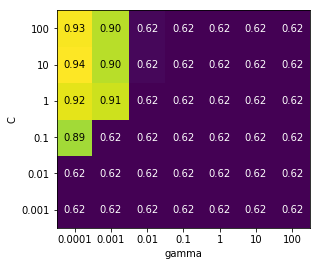

In [13]:
scores = np.array(results.mean_test_score).reshape(6, 7)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [14]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_2 = GridSearchCV(SVC(kernel="linear"), param_grid, cv=kfold)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'C': 100}

In [33]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400],
             'penalty': ['l1', 'l2']}

grid_3 = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'C': 100, 'penalty': 'l2'}

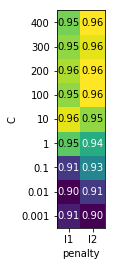

In [34]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_3.cv_results_)
# show the first 5 rows
# display(results.head())

scores = np.array(results.mean_test_score).reshape(9, 2)
# plot the mean cross-validation scores
heatmap(scores, xlabel='penalty', xticklabels=param_grid['penalty'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [35]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('Logistic regresion', grid_3.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 0.9672131147540983
recall_score: 0.9752066115702479
f1_score: 0.9711934156378601
accuracy_score: 0.9627659574468085
SVM linear
R^2: 0.9663865546218487
recall_score: 0.9504132231404959
f1_score: 0.9583333333333334
accuracy_score: 0.9468085106382979
Logistic regresion
R^2: 0.9747899159663865
recall_score: 0.9586776859504132
f1_score: 0.9666666666666667
accuracy_score: 0.9574468085106383


In [37]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM linear', 'Logistic regression'])
df

,Method,accuracy_score,f1_score,precision_score,recall_score
0,SVM rbf,0.962766,0.971193,0.967213,0.975207
1,SVM linear,0.946809,0.958333,0.966387,0.950413
2,Logistic regression,0.957447,0.966667,0.974790,0.958678
